In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("bollywoodboxoffice_raw.csv")

In [3]:
df.head()

,movie_name,movie_url,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_total_worldwide,movie_genre,movie_movierelease,movie_director,movie_director_url,movie_banner,movie_producer,movie_stars,movie_details
0,Angrezi Medium,https://www.bollywoodmdb.com/movies/hindi-medi...,: 4.03 cr,: 9.03 cr,: 9.36 cr,: 9.36 cr,: 13.50 cr,"Drama, Comedy","13 March, 2020 | 2 hrs 25 mins",Homi Adajania,https://www.bollywoodmdb.com/celebrities/homi-...,"Banner : Maddock Films, Jio Studios","Producer : Dinesh Vijan , Jyoti Deshpande","Star : Irrfan Khan , Radhika Madan, Kareena Ka...",When his daughter decides to further her studi...
1,Baaghi 3,https://www.bollywoodmdb.com/movies/baaghi-3/1...,: 17.50 cr,: 53.83 cr,: 90.67 cr,: 93.37 cr,: 137 cr,Action,"06 March, 2020 | 2 hrs 27 mins",Ahmed Khan,https://www.bollywoodmdb.com/celebrities/ahmed...,"Banner : Nadiadwala Grandson Entertainment, Fo...",Producer : Sajid Nadiadwala,"Star : Tiger Shroff , Shraddha Kapoor, Riteish...",A man embarks on a bloody rampage to save his ...
2,Thappad,https://www.bollywoodmdb.com/movies/thappad/16643,: 3.07 cr,: 14.66 cr,: 22.79 cr,: 30.61 cr,: 44.50 cr,"Drama, Social","28 February, 2020 | 2 hrs 22 mins",Anubhav Sinha,https://www.bollywoodmdb.com/celebrities/anubh...,"Banner : Benaras Media Works, T-Series Super C...","Producer : Bhushan Kumar , Krishan Kumar, Anub...","Star : Taapsee Pannu , Pavail Gulati, Dia Mirza",Thappad is a story of Amrita whose seemingly p...
3,Shubh Mangal Zyada Saavdhan,https://www.bollywoodmdb.com/movies/shubh-mang...,: 9.55 cr,: 32.66 cr,: 44.84 cr,: 62.78 cr,: 86.39 cr,"Comedy, Romance","21 February, 2020 | 2 hrs",Hitesh Kewalya,https://www.bollywoodmdb.com/celebrities/hites...,"Banner : Colour Yellow Productions Pvt Ltd, T-...","Producer : Aanand L Rai , Himanshu Sharma, Bhu...","Star : Ayushman Khurana , Jitendra Kumar, Gajr...",The road to achieving a happy ending is a litt...
4,Bhoot: Part One - The Haunted Ship,https://www.bollywoodmdb.com/movies/bhoot-part...,: 5.10 cr,: 16.36 cr,: 24.18 cr,: 31.97 cr,: 40.94 cr,Horror,"21 February, 2020 | 1 hrs 57 mins",Bhanu Pratap Singh,https://www.bollywoodmdb.com/celebrities/bhanu...,"Banner : Dharma Productions, Zee Studios","Producer : Hiroo Johar , Karan Johar, Apoorva ...","Star : Vicky Kaushal , Bhumi Pednekar, Ashutos...",A couple is trapped on an abandoned ship lying...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   movie_name             130 non-null    object
 1   movie_url              130 non-null    object
 2   movie_opening          130 non-null    object
 3   movie_weekend          130 non-null    object
 4   movie_firstweek        130 non-null    object
 5   movie_total            130 non-null    object
 6   movie_total_worldwide  130 non-null    object
 7   movie_genre            129 non-null    object
 8   movie_movierelease     130 non-null    object
 9   movie_director         130 non-null    object
 10  movie_director_url     130 non-null    object
 11  movie_banner           130 non-null    object
 12  movie_producer         129 non-null    object
 13  movie_stars            129 non-null    object
 14  movie_details          119 non-null    object
dtypes: object(15)
memory us

In [5]:
df.isnull().sum()

movie_name                0
movie_url                 0
movie_opening             0
movie_weekend             0
movie_firstweek           0
movie_total               0
movie_total_worldwide     0
movie_genre               1
movie_movierelease        0
movie_director            0
movie_director_url        0
movie_banner              0
movie_producer            1
movie_stars               1
movie_details            11
dtype: int64

In [6]:
#drop unwanted columns
df=df.drop(['movie_url','movie_director_url'],axis=1)

In [7]:
df.columns

Index(['movie_name', 'movie_opening', 'movie_weekend', 'movie_firstweek',
       'movie_total', 'movie_total_worldwide', 'movie_genre',
       'movie_movierelease', 'movie_director', 'movie_banner',
       'movie_producer', 'movie_stars', 'movie_details'],
      dtype='object')

In [8]:
#replace special character with blank space 
columns=['movie_opening','movie_weekend','movie_firstweek','movie_total','movie_total_worldwide']
for i,c in enumerate(columns):
    df[c]=df[c].replace({':':'' , 'cr':'' , ',':'' , '---':'' , " ":''},regex=True)  #replace 
    df[c]=pd.to_numeric(df[c],errors='coerce').fillna(0)  #converting to float

In [9]:
df.dtypes

movie_name                object
movie_opening            float64
movie_weekend            float64
movie_firstweek          float64
movie_total              float64
movie_total_worldwide    float64
movie_genre               object
movie_movierelease        object
movie_director            object
movie_banner              object
movie_producer            object
movie_stars               object
movie_details             object
dtype: object

In [10]:
#as in our dataset we can see that in movierelease the length and date are combined.
#so first separate them and keep in new data 
#then again assign them with another name
#And then again drop the new data we have made
new=df["movie_movierelease"].str.split('|',n=1,expand=True)
new

,0,1
0,"13 March, 2020",2 hrs 25 mins
1,"06 March, 2020",2 hrs 27 mins
2,"28 February, 2020",2 hrs 22 mins
3,"21 February, 2020",2 hrs
4,"21 February, 2020",1 hrs 57 mins
...,...,...
125,"22 September, 2017",2 hrs 15 mins
126,"22 September, 2017",2 hrs 4 mins
127,"15 September, 2017",2 hrs 27 mins
128,"15 September, 2017",2 hrs 4 mins


In [11]:
df["release_date"]=new[0]
df["movie_length"]=new[1]

In [12]:
df=df.drop(["movie_movierelease"],axis=1)

In [13]:
df

,movie_name,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_total_worldwide,movie_genre,movie_director,movie_banner,movie_producer,movie_stars,movie_details,release_date,movie_length
0,Angrezi Medium,4.03,9.03,9.36,9.36,13.50,"Drama, Comedy",Homi Adajania,"Banner : Maddock Films, Jio Studios","Producer : Dinesh Vijan , Jyoti Deshpande","Star : Irrfan Khan , Radhika Madan, Kareena Ka...",When his daughter decides to further her studi...,"13 March, 2020",2 hrs 25 mins
1,Baaghi 3,17.50,53.83,90.67,93.37,137.00,Action,Ahmed Khan,"Banner : Nadiadwala Grandson Entertainment, Fo...",Producer : Sajid Nadiadwala,"Star : Tiger Shroff , Shraddha Kapoor, Riteish...",A man embarks on a bloody rampage to save his ...,"06 March, 2020",2 hrs 27 mins
2,Thappad,3.07,14.66,22.79,30.61,44.50,"Drama, Social",Anubhav Sinha,"Banner : Benaras Media Works, T-Series Super C...","Producer : Bhushan Kumar , Krishan Kumar, Anub...","Star : Taapsee Pannu , Pavail Gulati, Dia Mirza",Thappad is a story of Amrita whose seemingly p...,"28 February, 2020",2 hrs 22 mins
3,Shubh Mangal Zyada Saavdhan,9.55,32.66,44.84,62.78,86.39,"Comedy, Romance",Hitesh Kewalya,"Banner : Colour Yellow Productions Pvt Ltd, T-...","Producer : Aanand L Rai , Himanshu Sharma, Bhu...","Star : Ayushman Khurana , Jitendra Kumar, Gajr...",The road to achieving a happy ending is a litt...,"21 February, 2020",2 hrs
4,Bhoot: Part One - The Haunted Ship,5.10,16.36,24.18,31.97,40.94,Horror,Bhanu Pratap Singh,"Banner : Dharma Productions, Zee Studios","Producer : Hiroo Johar , Karan Johar, Apoorva ...","Star : Vicky Kaushal , Bhumi Pednekar, Ashutos...",A couple is trapped on an abandoned ship lying...,"21 February, 2020",1 hrs 57 mins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Bhoomi,2.25,7.48,10.28,10.63,15.68,Drama,Omung Kumar,Banner : T-Series Super Cassettes Industries L...,"Producer : Sandeep Singh , Bhushan Kumar, Kris...","Star : Sanjay Dutt , Aditi Rao Hydari, Sharad ...","A gory revenge tale of father and daughter, wh...","22 September, 2017",2 hrs 15 mins
126,Haseena Parkar,1.87,6.10,8.00,8.03,9.00,"Biographical, Crime",Apoorva Lakhia,Banner : Swiss Entertainment Pvt. Ltd.,Producer : Nahid Khan,"Star : Shraddha Kapoor , Siddhanth Kapoor, Ank...",The biographical film on the life of Haseena P...,"22 September, 2017",2 hrs 4 mins
127,Lucknow Central,2.04,8.42,10.42,11.20,16.95,Thriller,Ranjit Tiwari,"Banner : Viacom18 Motion Pictures, Emmay Enter...","Producer : Monisha Advani , Nikhil Advani, Via...","Star : Farhan Akhtar , Diana Penty, Deepak Dob...",Kishen is wrongly framed in a murder case and ...,"15 September, 2017",2 hrs 27 mins
128,Simran,2.77,10.65,15.48,17.26,27.69,Drama,Hansal Mehta,Banner : T-Series Super Cassettes Industries L...,"Producer : Bhushan Kumar , Shailesh R. Singh, ...","Star : Kangana Ranaut , Sohum Shah, Rupinder N...",The bittersweet tale of a 30-year old Gujarati...,"15 September, 2017",2 hrs 4 mins


In [14]:
#repeat the same above steps for oyther columns
new=df['movie_producer'].str.split(':',n=1,expand=True)
new1=df['movie_banner'].str.split(':',n=1,expand=True)
new2=df['movie_stars'].str.split(':',n=1,expand=True)

In [15]:
new

,0,1
0,Producer,"Dinesh Vijan , Jyoti Deshpande"
1,Producer,Sajid Nadiadwala
2,Producer,"Bhushan Kumar , Krishan Kumar, Anubhav Sinha"
3,Producer,"Aanand L Rai , Himanshu Sharma, Bhushan Kumar"
4,Producer,"Hiroo Johar , Karan Johar, Apoorva Mehta"
...,...,...
125,Producer,"Sandeep Singh , Bhushan Kumar, Krishan Kumar"
126,Producer,Nahid Khan
127,Producer,"Monisha Advani , Nikhil Advani, Viacom18 Moti..."
128,Producer,"Bhushan Kumar , Shailesh R. Singh, Amit Agarwal"


In [16]:
new1

,0,1
0,Banner,"Maddock Films, Jio Studios"
1,Banner,"Nadiadwala Grandson Entertainment, Fox Star S..."
2,Banner,"Benaras Media Works, T-Series Super Cassettes..."
3,Banner,"Colour Yellow Productions Pvt Ltd, T-Series S..."
4,Banner,"Dharma Productions, Zee Studios"
...,...,...
125,Banner,"T-Series Super Cassettes Industries Ltd., Leg..."
126,Banner,Swiss Entertainment Pvt. Ltd.
127,Banner,"Viacom18 Motion Pictures, Emmay Entertainment..."
128,Banner,"T-Series Super Cassettes Industries Ltd., Kar..."


In [17]:
new2

,0,1
0,Star,"Irrfan Khan , Radhika Madan, Kareena Kapoor"
1,Star,"Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh"
2,Star,"Taapsee Pannu , Pavail Gulati, Dia Mirza"
3,Star,"Ayushman Khurana , Jitendra Kumar, Gajraj Rao"
4,Star,"Vicky Kaushal , Bhumi Pednekar, Ashutosh Rana"
...,...,...
125,Star,"Sanjay Dutt , Aditi Rao Hydari, Sharad Kelkar"
126,Star,"Shraddha Kapoor , Siddhanth Kapoor, Ankur Bhatia"
127,Star,"Farhan Akhtar , Diana Penty, Deepak Dobriyal"
128,Star,"Kangana Ranaut , Sohum Shah, Rupinder Nagra"


In [18]:
df['producer']=new[1]
df['banner']=new1[1]
df['stars']=new2[1]

In [19]:
df=df.drop(['movie_producer'],axis=1)
df=df.drop(['movie_banner'],axis=1)
df=df.drop(['movie_stars'],axis=1)

In [20]:
df

,movie_name,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_total_worldwide,movie_genre,movie_director,movie_details,release_date,movie_length,producer,banner,stars
0,Angrezi Medium,4.03,9.03,9.36,9.36,13.50,"Drama, Comedy",Homi Adajania,When his daughter decides to further her studi...,"13 March, 2020",2 hrs 25 mins,"Dinesh Vijan , Jyoti Deshpande","Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor"
1,Baaghi 3,17.50,53.83,90.67,93.37,137.00,Action,Ahmed Khan,A man embarks on a bloody rampage to save his ...,"06 March, 2020",2 hrs 27 mins,Sajid Nadiadwala,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh"
2,Thappad,3.07,14.66,22.79,30.61,44.50,"Drama, Social",Anubhav Sinha,Thappad is a story of Amrita whose seemingly p...,"28 February, 2020",2 hrs 22 mins,"Bhushan Kumar , Krishan Kumar, Anubhav Sinha","Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza"
3,Shubh Mangal Zyada Saavdhan,9.55,32.66,44.84,62.78,86.39,"Comedy, Romance",Hitesh Kewalya,The road to achieving a happy ending is a litt...,"21 February, 2020",2 hrs,"Aanand L Rai , Himanshu Sharma, Bhushan Kumar","Colour Yellow Productions Pvt Ltd, T-Series S...","Ayushman Khurana , Jitendra Kumar, Gajraj Rao"
4,Bhoot: Part One - The Haunted Ship,5.10,16.36,24.18,31.97,40.94,Horror,Bhanu Pratap Singh,A couple is trapped on an abandoned ship lying...,"21 February, 2020",1 hrs 57 mins,"Hiroo Johar , Karan Johar, Apoorva Mehta","Dharma Productions, Zee Studios","Vicky Kaushal , Bhumi Pednekar, Ashutosh Rana"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Bhoomi,2.25,7.48,10.28,10.63,15.68,Drama,Omung Kumar,"A gory revenge tale of father and daughter, wh...","22 September, 2017",2 hrs 15 mins,"Sandeep Singh , Bhushan Kumar, Krishan Kumar","T-Series Super Cassettes Industries Ltd., Leg...","Sanjay Dutt , Aditi Rao Hydari, Sharad Kelkar"
126,Haseena Parkar,1.87,6.10,8.00,8.03,9.00,"Biographical, Crime",Apoorva Lakhia,The biographical film on the life of Haseena P...,"22 September, 2017",2 hrs 4 mins,Nahid Khan,Swiss Entertainment Pvt. Ltd.,"Shraddha Kapoor , Siddhanth Kapoor, Ankur Bhatia"
127,Lucknow Central,2.04,8.42,10.42,11.20,16.95,Thriller,Ranjit Tiwari,Kishen is wrongly framed in a murder case and ...,"15 September, 2017",2 hrs 27 mins,"Monisha Advani , Nikhil Advani, Viacom18 Moti...","Viacom18 Motion Pictures, Emmay Entertainment...","Farhan Akhtar , Diana Penty, Deepak Dobriyal"
128,Simran,2.77,10.65,15.48,17.26,27.69,Drama,Hansal Mehta,The bittersweet tale of a 30-year old Gujarati...,"15 September, 2017",2 hrs 4 mins,"Bhushan Kumar , Shailesh R. Singh, Amit Agarwal","T-Series Super Cassettes Industries Ltd., Kar...","Kangana Ranaut , Sohum Shah, Rupinder Nagra"


In [21]:
df['release_day']=pd.DatetimeIndex(df['release_date']).day
df['release_month']=pd.DatetimeIndex(df['release_date']).month
df['release_year']=pd.DatetimeIndex(df['release_date']).year

In [22]:
look_up={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [23]:
df['release_month']=df['release_month'].apply(lambda x:look_up[x])

In [24]:
df

,movie_name,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_total_worldwide,movie_genre,movie_director,movie_details,release_date,movie_length,producer,banner,stars,release_day,release_month,release_year
0,Angrezi Medium,4.03,9.03,9.36,9.36,13.50,"Drama, Comedy",Homi Adajania,When his daughter decides to further her studi...,"13 March, 2020",2 hrs 25 mins,"Dinesh Vijan , Jyoti Deshpande","Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor",13,Mar,2020
1,Baaghi 3,17.50,53.83,90.67,93.37,137.00,Action,Ahmed Khan,A man embarks on a bloody rampage to save his ...,"06 March, 2020",2 hrs 27 mins,Sajid Nadiadwala,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh",6,Mar,2020
2,Thappad,3.07,14.66,22.79,30.61,44.50,"Drama, Social",Anubhav Sinha,Thappad is a story of Amrita whose seemingly p...,"28 February, 2020",2 hrs 22 mins,"Bhushan Kumar , Krishan Kumar, Anubhav Sinha","Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza",28,Feb,2020
3,Shubh Mangal Zyada Saavdhan,9.55,32.66,44.84,62.78,86.39,"Comedy, Romance",Hitesh Kewalya,The road to achieving a happy ending is a litt...,"21 February, 2020",2 hrs,"Aanand L Rai , Himanshu Sharma, Bhushan Kumar","Colour Yellow Productions Pvt Ltd, T-Series S...","Ayushman Khurana , Jitendra Kumar, Gajraj Rao",21,Feb,2020
4,Bhoot: Part One - The Haunted Ship,5.10,16.36,24.18,31.97,40.94,Horror,Bhanu Pratap Singh,A couple is trapped on an abandoned ship lying...,"21 February, 2020",1 hrs 57 mins,"Hiroo Johar , Karan Johar, Apoorva Mehta","Dharma Productions, Zee Studios","Vicky Kaushal , Bhumi Pednekar, Ashutosh Rana",21,Feb,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Bhoomi,2.25,7.48,10.28,10.63,15.68,Drama,Omung Kumar,"A gory revenge tale of father and daughter, wh...","22 September, 2017",2 hrs 15 mins,"Sandeep Singh , Bhushan Kumar, Krishan Kumar","T-Series Super Cassettes Industries Ltd., Leg...","Sanjay Dutt , Aditi Rao Hydari, Sharad Kelkar",22,Sep,2017
126,Haseena Parkar,1.87,6.10,8.00,8.03,9.00,"Biographical, Crime",Apoorva Lakhia,The biographical film on the life of Haseena P...,"22 September, 2017",2 hrs 4 mins,Nahid Khan,Swiss Entertainment Pvt. Ltd.,"Shraddha Kapoor , Siddhanth Kapoor, Ankur Bhatia",22,Sep,2017
127,Lucknow Central,2.04,8.42,10.42,11.20,16.95,Thriller,Ranjit Tiwari,Kishen is wrongly framed in a murder case and ...,"15 September, 2017",2 hrs 27 mins,"Monisha Advani , Nikhil Advani, Viacom18 Moti...","Viacom18 Motion Pictures, Emmay Entertainment...","Farhan Akhtar , Diana Penty, Deepak Dobriyal",15,Sep,2017
128,Simran,2.77,10.65,15.48,17.26,27.69,Drama,Hansal Mehta,The bittersweet tale of a 30-year old Gujarati...,"15 September, 2017",2 hrs 4 mins,"Bhushan Kumar , Shailesh R. Singh, Amit Agarwal","T-Series Super Cassettes Industries Ltd., Kar...","Kangana Ranaut , Sohum Shah, Rupinder Nagra",15,Sep,2017


In [25]:
#convert movie_lenth in minutes
new=df.movie_length.str.split(n=4,expand=True)

In [26]:
new

,0,1,2,3
0,2,hrs,25,mins
1,2,hrs,27,mins
2,2,hrs,22,mins
3,2,hrs,None,None
4,1,hrs,57,mins
...,...,...,...,...
125,2,hrs,15,mins
126,2,hrs,4,mins
127,2,hrs,27,mins
128,2,hrs,4,mins


In [27]:
df['hours']=new[0]
df['minutes']=new[2]

In [28]:
df.hours=df.hours.replace({' ':' '},regex=True)
df.minutes=df.minutes.replace({' ':' '},regex=True)

In [29]:
df.hours=df.hours.astype(str).astype(int)
df.minutes=df.minutes.fillna(0)
df.minutes=df.minutes.astype(str).astype(int)

In [30]:
df['runtime']=df['hours']*60+df['minutes']

In [31]:
df

,movie_name,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_total_worldwide,movie_genre,movie_director,movie_details,release_date,movie_length,producer,banner,stars,release_day,release_month,release_year,hours,minutes,runtime
0,Angrezi Medium,4.03,9.03,9.36,9.36,13.50,"Drama, Comedy",Homi Adajania,When his daughter decides to further her studi...,"13 March, 2020",2 hrs 25 mins,"Dinesh Vijan , Jyoti Deshpande","Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor",13,Mar,2020,2,25,145
1,Baaghi 3,17.50,53.83,90.67,93.37,137.00,Action,Ahmed Khan,A man embarks on a bloody rampage to save his ...,"06 March, 2020",2 hrs 27 mins,Sajid Nadiadwala,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh",6,Mar,2020,2,27,147
2,Thappad,3.07,14.66,22.79,30.61,44.50,"Drama, Social",Anubhav Sinha,Thappad is a story of Amrita whose seemingly p...,"28 February, 2020",2 hrs 22 mins,"Bhushan Kumar , Krishan Kumar, Anubhav Sinha","Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza",28,Feb,2020,2,22,142
3,Shubh Mangal Zyada Saavdhan,9.55,32.66,44.84,62.78,86.39,"Comedy, Romance",Hitesh Kewalya,The road to achieving a happy ending is a litt...,"21 February, 2020",2 hrs,"Aanand L Rai , Himanshu Sharma, Bhushan Kumar","Colour Yellow Productions Pvt Ltd, T-Series S...","Ayushman Khurana , Jitendra Kumar, Gajraj Rao",21,Feb,2020,2,0,120
4,Bhoot: Part One - The Haunted Ship,5.10,16.36,24.18,31.97,40.94,Horror,Bhanu Pratap Singh,A couple is trapped on an abandoned ship lying...,"21 February, 2020",1 hrs 57 mins,"Hiroo Johar , Karan Johar, Apoorva Mehta","Dharma Productions, Zee Studios","Vicky Kaushal , Bhumi Pednekar, Ashutosh Rana",21,Feb,2020,1,57,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Bhoomi,2.25,7.48,10.28,10.63,15.68,Drama,Omung Kumar,"A gory revenge tale of father and daughter, wh...","22 September, 2017",2 hrs 15 mins,"Sandeep Singh , Bhushan Kumar, Krishan Kumar","T-Series Super Cassettes Industries Ltd., Leg...","Sanjay Dutt , Aditi Rao Hydari, Sharad Kelkar",22,Sep,2017,2,15,135
126,Haseena Parkar,1.87,6.10,8.00,8.03,9.00,"Biographical, Crime",Apoorva Lakhia,The biographical film on the life of Haseena P...,"22 September, 2017",2 hrs 4 mins,Nahid Khan,Swiss Entertainment Pvt. Ltd.,"Shraddha Kapoor , Siddhanth Kapoor, Ankur Bhatia",22,Sep,2017,2,4,124
127,Lucknow Central,2.04,8.42,10.42,11.20,16.95,Thriller,Ranjit Tiwari,Kishen is wrongly framed in a murder case and ...,"15 September, 2017",2 hrs 27 mins,"Monisha Advani , Nikhil Advani, Viacom18 Moti...","Viacom18 Motion Pictures, Emmay Entertainment...","Farhan Akhtar , Diana Penty, Deepak Dobriyal",15,Sep,2017,2,27,147
128,Simran,2.77,10.65,15.48,17.26,27.69,Drama,Hansal Mehta,The bittersweet tale of a 30-year old Gujarati...,"15 September, 2017",2 hrs 4 mins,"Bhushan Kumar , Shailesh R. Singh, Amit Agarwal","T-Series Super Cassettes Industries Ltd., Kar...","Kangana Ranaut , Sohum Shah, Rupinder Nagra",15,Sep,2017,2,4,124


In [32]:
df.columns

Index(['movie_name', 'movie_opening', 'movie_weekend', 'movie_firstweek',
       'movie_total', 'movie_total_worldwide', 'movie_genre', 'movie_director',
       'movie_details', 'release_date', 'movie_length', 'producer', 'banner',
       'stars', 'release_day', 'release_month', 'release_year', 'hours',
       'minutes', 'runtime'],
      dtype='object')

In [33]:
#keep the required column and put them in order
df=df[['movie_name','movie_opening', 'movie_weekend', 'movie_firstweek','movie_total',
       'movie_total_worldwide', 'movie_genre', 'movie_director','release_date', 'release_day',
       'release_month', 'release_year','runtime', 'producer', 'banner','stars','movie_details']]

In [34]:
df.head()

,movie_name,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_total_worldwide,movie_genre,movie_director,release_date,release_day,release_month,release_year,runtime,producer,banner,stars,movie_details
0,Angrezi Medium,4.03,9.03,9.36,9.36,13.50,"Drama, Comedy",Homi Adajania,"13 March, 2020",13,Mar,2020,145,"Dinesh Vijan , Jyoti Deshpande","Maddock Films, Jio Studios","Irrfan Khan , Radhika Madan, Kareena Kapoor",When his daughter decides to further her studi...
1,Baaghi 3,17.50,53.83,90.67,93.37,137.00,Action,Ahmed Khan,"06 March, 2020",6,Mar,2020,147,Sajid Nadiadwala,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Shraddha Kapoor, Riteish Deshmukh",A man embarks on a bloody rampage to save his ...
2,Thappad,3.07,14.66,22.79,30.61,44.50,"Drama, Social",Anubhav Sinha,"28 February, 2020",28,Feb,2020,142,"Bhushan Kumar , Krishan Kumar, Anubhav Sinha","Benaras Media Works, T-Series Super Cassettes...","Taapsee Pannu , Pavail Gulati, Dia Mirza",Thappad is a story of Amrita whose seemingly p...
3,Shubh Mangal Zyada Saavdhan,9.55,32.66,44.84,62.78,86.39,"Comedy, Romance",Hitesh Kewalya,"21 February, 2020",21,Feb,2020,120,"Aanand L Rai , Himanshu Sharma, Bhushan Kumar","Colour Yellow Productions Pvt Ltd, T-Series S...","Ayushman Khurana , Jitendra Kumar, Gajraj Rao",The road to achieving a happy ending is a litt...
4,Bhoot: Part One - The Haunted Ship,5.10,16.36,24.18,31.97,40.94,Horror,Bhanu Pratap Singh,"21 February, 2020",21,Feb,2020,117,"Hiroo Johar , Karan Johar, Apoorva Mehta","Dharma Productions, Zee Studios","Vicky Kaushal , Bhumi Pednekar, Ashutosh Rana",A couple is trapped on an abandoned ship lying...


In [35]:
df.columns

Index(['movie_name', 'movie_opening', 'movie_weekend', 'movie_firstweek',
       'movie_total', 'movie_total_worldwide', 'movie_genre', 'movie_director',
       'release_date', 'release_day', 'release_month', 'release_year',
       'runtime', 'producer', 'banner', 'stars', 'movie_details'],
      dtype='object')

In [36]:
#converting raw data to clean data
df.to_csv('Bollywood_box_clean.csv',index=False)

In [37]:
#Movies with highesht opening first day
df=df.sort_values('movie_opening',ascending=False)
top=df.head(15)
top

,movie_name,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_total_worldwide,movie_genre,movie_director,release_date,release_day,release_month,release_year,runtime,producer,banner,stars,movie_details
26,War,53.35,166.25,238.35,318.01,455.00,"Action, Thriller",Siddharth Anand,"02 October, 2019",2,Oct,2019,156,Aditya Chopra,Yash Raj Films,"Hrithik Roshan , Tiger Shroff, Vaani Kapoor",An Indian soldier chases after his mentor who ...
71,Thugs Of Hindostan,52.25,123.00,140.40,151.04,251.84,"Action, Adventure",Vijay Krishna Acharya,"08 November, 2018",8,Nov,2018,165,Aditya Chopra,Yash Raj Films,"Amitabh Bachchan , Aamir Khan, Katrina Kaif","In the 18th century, the British East India Co..."
40,Bharat,42.30,150.10,180.05,201.86,314.68,"Drama, Period",Ali Abbas Zafar,"05 June, 2019",5,Jun,2019,155,"Atul Agnihotri , Alvira Khan Agnihotri, Bhush...","Salman Khan Films, Reel Life Production Pvt Ltd","Salman Khan , Katrina Kaif, Disha Patani",At the cusp of India's birth as an Independent...
90,Sanju,34.75,120.06,202.51,341.22,579.00,Biographical,Rajkumar Hirani,"29 June, 2018",29,Jun,2018,162,"Vidhu Vinod Chopra , Rajkumar Hirani","Vinod Chopra Films, Rajkumar Hirani Films, Fo...","Ranbir Kapoor , Paresh Rawal, Manisha Koirala",A biopic of the controversial life of actor Sa...
113,Tiger Zinda Hai,34.10,114.93,206.04,339.16,558.00,"Action, Thriller",Ali Abbas Zafar,"22 December, 2017",22,Dec,2017,161,Aditya Chopra,Yash Raj Films,"Salman Khan , Katrina Kaif, Sajjad Delafrooz",Tiger and Zoya return to rescue 40 nurses held...
120,Golmaal Again,30.14,87.60,136.07,205.52,309.37,Comedy,Rohit Shetty,"20 October, 2017",20,Oct,2017,151,Rohit Shetty,Reliance Entertainment,"Ajay Devgn , Parineeti Chopra, Arshad Warsi","A bunch of ex-friends, keeping their all diffe..."
91,Race 3,29.17,106.47,144.51,161.04,300.04,"Action, Thriller",Remo D'Souza,"15 June, 2018",15,Jun,2018,160,"Salma Khan , Ramesh S. Taurani","Tips Music Films, Salman Khan Films","Salman Khan , Jacqueline Fernandez, Anil Kapoor",Revolves around a family that deals in borderl...
33,Mission Mangal,29.16,97.56,128.16,200.16,239.83,Drama,Jagan Shakti,"15 August, 2019",15,Aug,2019,133,"Cape of Good Films , Hope Productions, Fox St...","Fox Star Studios, Cape of Good Films, Hope Pr...","Akshay Kumar , Vidya Balan, Taapsee Pannu",Based on true events of the Indian Space Resea...
83,Gold,25.25,71.30,89.30,107.37,149.50,NaN,Reema Kagti,"15 August, 2018",15,Aug,2018,153,"Ritesh Sidhwani , Farhan Akhtar",Excel Entertainment,"Akshay Kumar , Mouni Roy, Kunal Kapoor","Set in 1948, the historic story of India's fir..."
100,Baaghi 2,25.10,73.10,112.85,165.50,251.31,"Action, Romance",Ahmed Khan,"30 March, 2018",30,Mar,2018,145,Sajid Nadiadwala,"Nadiadwala Grandson Entertainment, Fox Star S...","Tiger Shroff , Disha Patani, Manoj Bajpai",A hapless mother contacts her ex-boyfriend to ...


In [38]:
import seaborn as sns

Text(0.5, 0, 'Crores')

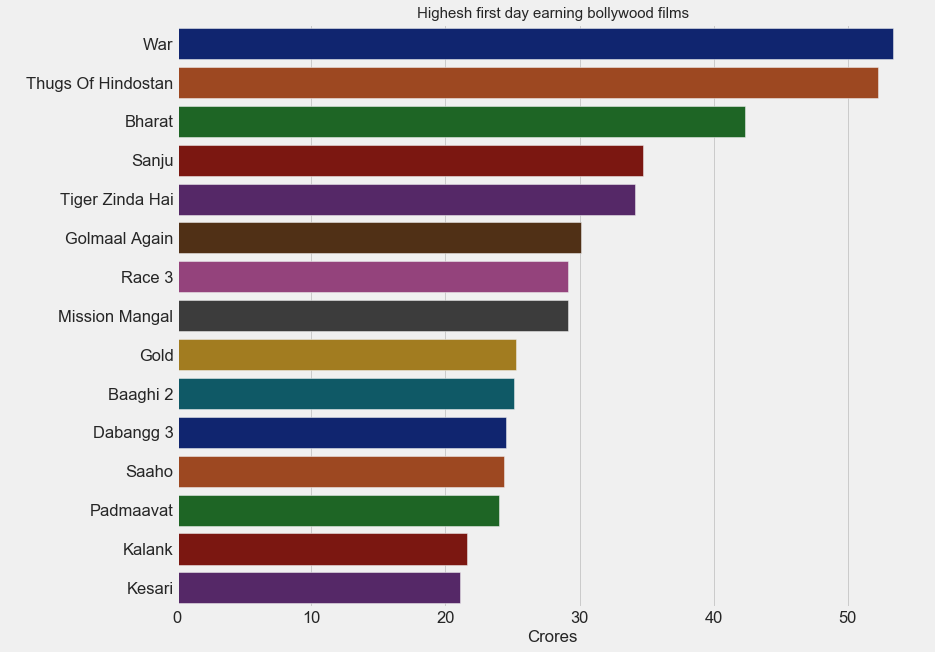

In [39]:
sns.set_context("talk")
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,10))
ax=sns.barplot(x='movie_opening',y='movie_name',data=top,palette="dark")
plt.title("Highesh first day earning bollywood films",size=15)
ax.set_ylabel(" ")
ax.set_xlabel('Crores')

In [41]:
df=df.sort_values('movie_total_worldwide',ascending=False)
top1=df.head(15)
top1

,movie_name,movie_opening,movie_weekend,movie_firstweek,movie_total,movie_total_worldwide,movie_genre,movie_director,release_date,release_day,release_month,release_year,runtime,producer,banner,stars,movie_details
109,Padmaavat,24.00,114.00,166.50,300.26,585.00,"Historical, Drama, Action",Sanjay Leela Bhansali,"25 January, 2018",25,Jan,2018,163,"Sanjay Leela Bhansali , Sudhanshu Vats, Ajit ...","Viacom18 Motion Pictures, Bhansali Productions","Deepika Padukone , Shahid Kapoor, Ranveer Singh",A group of fearless Rajput women self-immolate...
90,Sanju,34.75,120.06,202.51,341.22,579.00,Biographical,Rajkumar Hirani,"29 June, 2018",29,Jun,2018,162,"Vidhu Vinod Chopra , Rajkumar Hirani","Vinod Chopra Films, Rajkumar Hirani Films, Fo...","Ranbir Kapoor , Paresh Rawal, Manisha Koirala",A biopic of the controversial life of actor Sa...
113,Tiger Zinda Hai,34.10,114.93,206.04,339.16,558.00,"Action, Thriller",Ali Abbas Zafar,"22 December, 2017",22,Dec,2017,161,Aditya Chopra,Yash Raj Films,"Salman Khan , Katrina Kaif, Sajjad Delafrooz",Tiger and Zoya return to rescue 40 nurses held...
121,Secret Superstar,4.80,31.10,41.59,59.34,547.00,"Drama, Musical",Advait Chandan,"19 October, 2017",19,Oct,2017,150,"Aamir Khan , Kiran Rao, Zee Studios","Zee Studios, Aamir Khan Productions","Zaira Wasim , Meher Vij, Raj Arjun","A girl, who hails from a conservative Muslim f..."
67,2.0,20.25,95.00,139.75,177.75,520.00,"Sci-fi, Action",Shankar,"29 November, 2018",29,Nov,2018,146,Subaskaran,"Lyca Productions, Dharma Productions","Rajinikanth , Akshay Kumar, Amy Jackson",After facing a threat that is beyond the curre...
26,War,53.35,166.25,238.35,318.01,455.00,"Action, Thriller",Siddharth Anand,"02 October, 2019",2,Oct,2019,156,Aditya Chopra,Yash Raj Films,"Hrithik Roshan , Tiger Shroff, Vaani Kapoor",An Indian soldier chases after his mentor who ...
31,Saaho,24.40,79.08,116.03,130.98,424.00,"Action, Thriller",Sujeeth,"30 August, 2019",30,Aug,2019,171,Vamsi - Pramod,"UV Creations, T-Series Super Cassettes Indust...","Prabhas , Shraddha Kapoor, Jackie Shroff",An undercover cop becomes embroiled in a battl...
38,Kabir Singh,20.21,70.83,134.42,278.24,369.58,Drama,Sandeep Reddy Vanga,"21 June, 2019",21,Jun,2019,175,"Bhushan Kumar , Krishan Kumar, Murad Khetani","T-Series Super Cassettes Industries Ltd., Cin...","Shahid Kapoor , Kiara Advani, Arjan Bajwa",Kabir Singh is a remake of a Telugu movie Arju...
11,Tanhaji: The Unsung Warrior,15.10,61.75,118.91,276.90,341.00,"Historical, Action",Om Raut,"10 January, 2020",10,Jan,2020,134,"Ajay Devgn , Bhushan Kumar, Krishan Kumar","T-Series Super Cassettes Industries Ltd., Aja...","Ajay Devgn , Saif Ali Khan, Kajol","It is based on the life of Tanaji Malusare, a ..."
63,Simmba,20.72,75.11,150.81,240.22,317.61,"Action, Comedy, Drama",Rohit Shetty,"28 December, 2018",28,Dec,2018,159,"Hiroo Johar , Rohit Shetty, Apoorva Mehta","Dharma Productions, Reliance Entertainment, R...","Ranveer Singh , Sara Ali Khan, Sonu Sood","Simmba, a Corrupt Officer, enjoys all the perk..."


Text(0.5, 0, 'Crores')

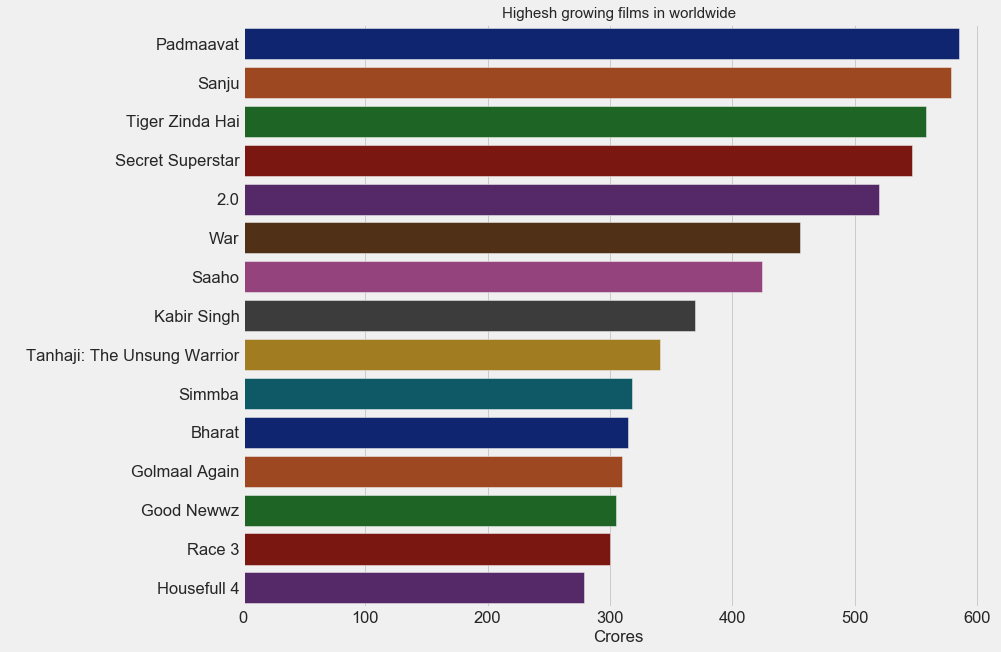

In [42]:
sns.set_context("talk")
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,10))
ax=sns.barplot(x='movie_total_worldwide',y='movie_name',data=top1,palette="dark")
plt.title("Highesh growing films in worldwide",size=15)
ax.set_ylabel(" ")
ax.set_xlabel('Crores')

In [44]:
df['release_year']=df.release_year.astype('category')

In [47]:
x="runtime"
y="movie_total_worldwide"

In [51]:
df.release_date=pd.to_datetime(df.release_date)  #convert to datetime
df['day']=df.release_date.dt.dayofweek  #make a new column for day of the week where monday is 0 tuesday is 1 so on...

In [52]:
df.day.value_counts()

4    115
3      9
2      6
Name: day, dtype: int64

In [53]:
df.day=df.day.replace([4,3,2],['Friday','Thursday','Tuesday'])

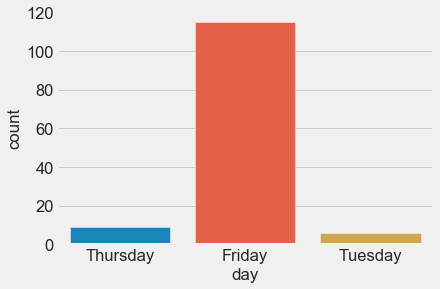

In [54]:
ax=sns.countplot(x='day',data=df)

# Total 115 movies were released on Friday

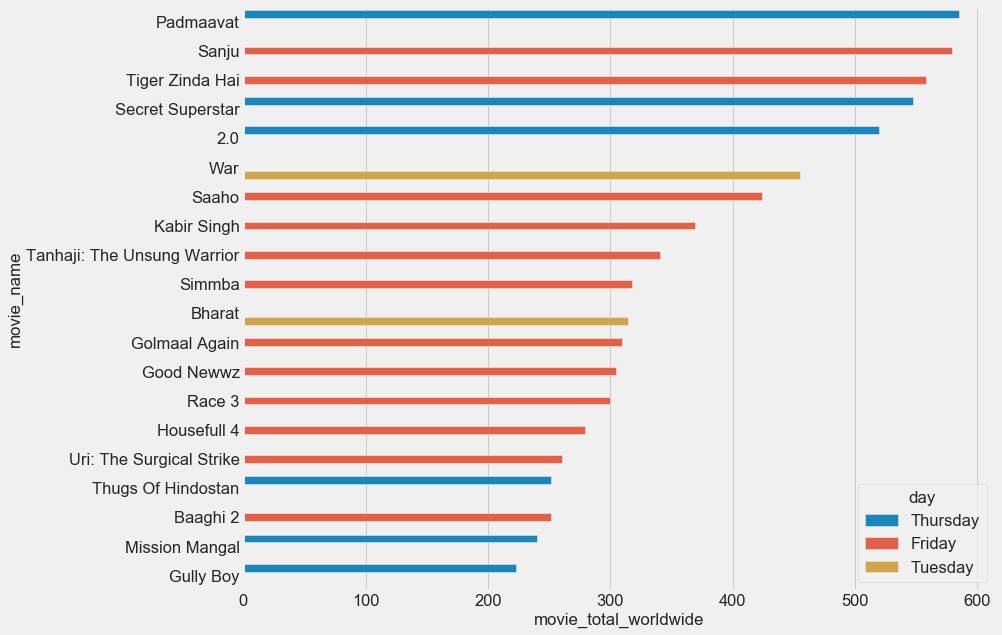

In [55]:
sns.set_context("talk")
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,10))
ax=sns.barplot(x='movie_total_worldwide',y='movie_name',hue='day',data=df.head(20))